#### Conditional Graph
* Implement conditional logic to route flow of data to different Nodes

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class State(TypedDict):
    operation: str
    num_one: int
    num_two: int
    result: int

In [3]:
def add_node(state: State) -> State:
    """Node that performs addition."""
    new_state = State(result= state['num_one'] + state['num_two'])
    return new_state

def subtract_node(state: State) -> State:
    """Node that performs subtraction."""
    new_state = State(result= state['num_one'] - state['num_two'])
    return new_state

#### Router Node
* Router node doesn't modify the state, it just decides the next node to call

In [4]:
def router(state: State) -> State:
    """Node that routes to the appropriate operation node based on the operation."""
    if state['operation'] == '+':
        return "add_node_call"
    elif state['operation'] == '-':
        return 'subtract_node_call'
    else:
        raise ValueError("Unsupported operation")

#### Add Nodes to GraphBuilder
* lambda state:state (decide next node based on state)

In [ ]:
graph_builder = StateGraph(State)
graph_builder.add_node("add_node", add_node)
graph_builder.add_node("subtract_node", subtract_node)
graph_builder.add_node("router", lambda state:state)

#### Define Conditional Edges
* router Node will choose the next Node. Based on initial State 'operator' value 

In [9]:
graph_builder.add_edge(START, "router")
graph_builder.add_conditional_edges(
    "router",
    router,
    {
        # Edge: Node
        "add_node_call": "add_node",
        "subtract_node_call": "subtract_node"
    }
)
graph_builder.add_edge("add_node", END)
graph_builder.add_edge("subtract_node", END)


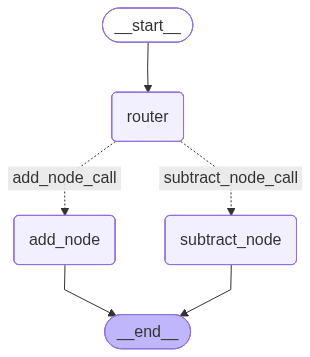

In [10]:
from IPython.display import Image, display
app = graph_builder.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
initial_state = State(operation='+', num_one=5, num_two=3)
result = app.invoke(initial_state)
print("Result of addition:", result['result'])  # Should print 8

Result of addition: 8
